<a href="https://colab.research.google.com/github/dansok0/MET4OP/blob/master/Mapeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
% pip install pandas
% pip install geopandas
% pip install contextily
% pip install fiona
% pip install shapely
% pip install pyproj
% pip install mapclassify
!apt install libspatialindex-dev
% pip install rtree

     |████████████████████████████████| 972kB 9.3MB/s 
     |████████████████████████████████| 6.5MB 21.5MB/s 
     |████████████████████████████████| 14.8MB 323kB/s 
     |████████████████████████████████| 18.3MB 254kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]

In [4]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np

In [5]:
##Archivo .shp
censo = gpd.read_file(
    "/content/drive/MyDrive/dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp"
)
censo.head()
censo.dtypes

AREA           float64
PERIMETER      float64
PAIS0210_        int64
PAIS0210_I       int64
PROV            object
DEPTO           object
FRAC            object
RADIO           object
TIPO            object
LINK            object
VARONES        float64
MUJERES        float64
TOT_POB        float64
HOGARES        float64
VIV_PART       float64
VIV_PART_H     float64
geometry      geometry
dtype: object

In [6]:
##Shp de elecciones
circuitos = gpd.read_file(
    "/content/drive/MyDrive/dataset/elecciones_2019/CABA.shp"
)
circuitos.head()
circuitos.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito        object
indec_p         object
indec_d         object
geometry      geometry
dtype: object

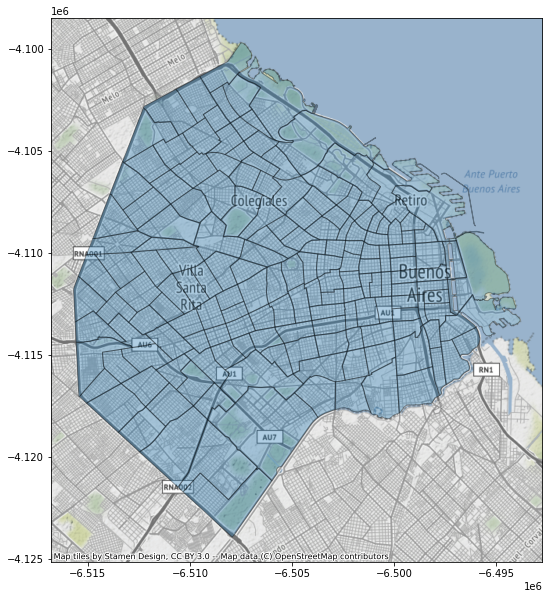

In [7]:
circuitos = circuitos.to_crs(epsg=3857)
ax = circuitos.plot(figsize=(10, 10), alpha=0.35, edgecolor='k')
ctx.add_basemap(ax)

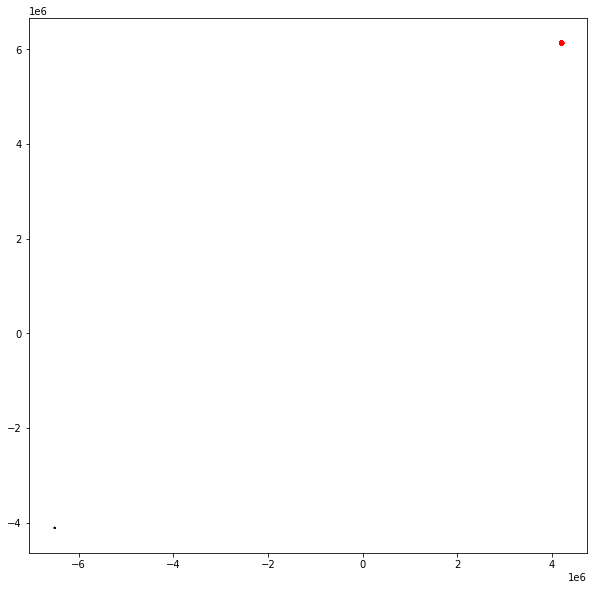

In [8]:
##CENTROIDES de los rangos censales dentro de cada uno de los circuitos electorales
aux = censo.centroid
# ploteo mi mapa base
base = circuitos.plot( figsize=(10, 10), color='None', edgecolor='black')
# añado mis centroides
aux.plot(ax=base, marker='o', color='red', markersize=5)

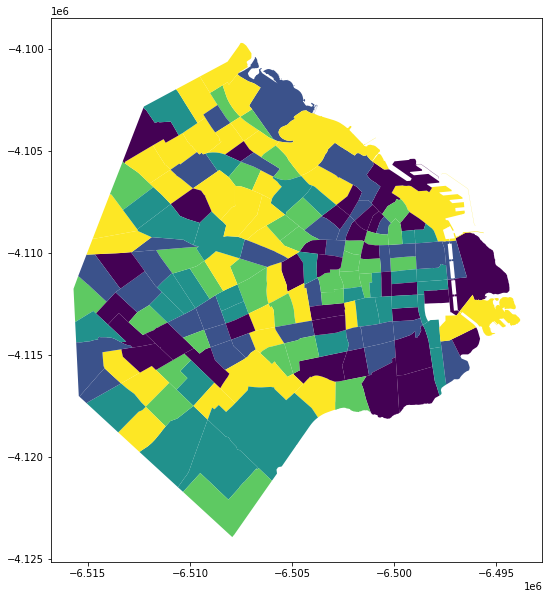

In [9]:
##Poblacion por circuito electoral en absoluto
circuitos['TOT_POB'] = (censo.TOT_POB/censo.AREA)
circuitos.plot(column='TOT_POB', scheme='quantiles', figsize=(10, 10))

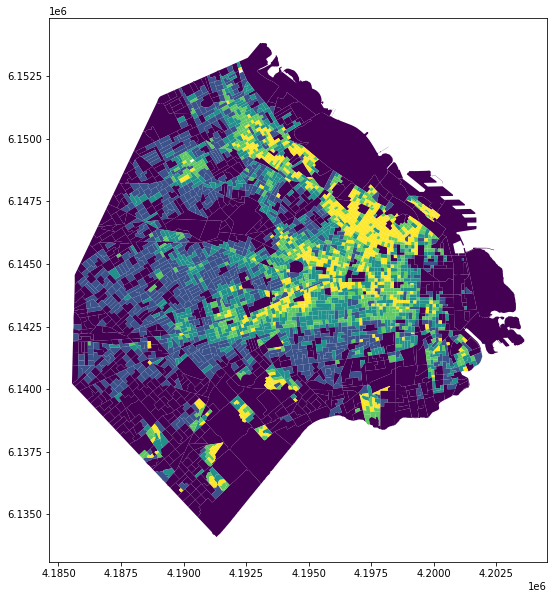

In [10]:
##Densidad poblacional por radio censal
censo['logRatio'] = (censo.TOT_POB/ censo.AREA)
censo.plot(column='logRatio', scheme='quantiles', figsize=(10, 10))

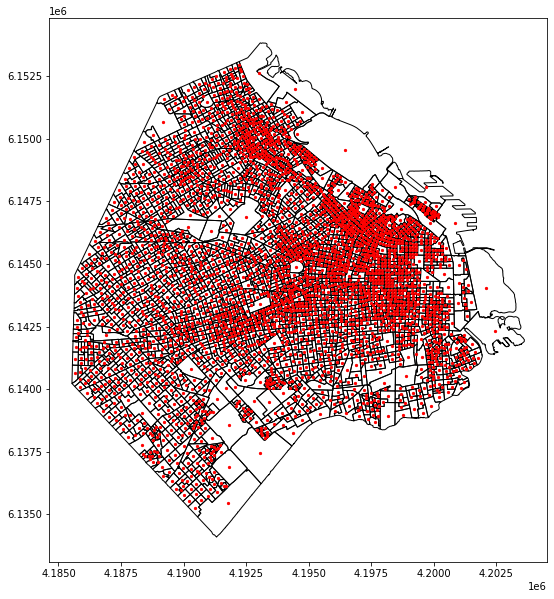

In [ ]:
# calculo el centroide de cada radio
aux = censo.centroid
# ploteo mi mapa base
base = censo.plot( figsize=(10, 10), color='None', edgecolor='black')
# añado mis centroides
aux.plot(ax=base, marker='o', color='red', markersize=5)

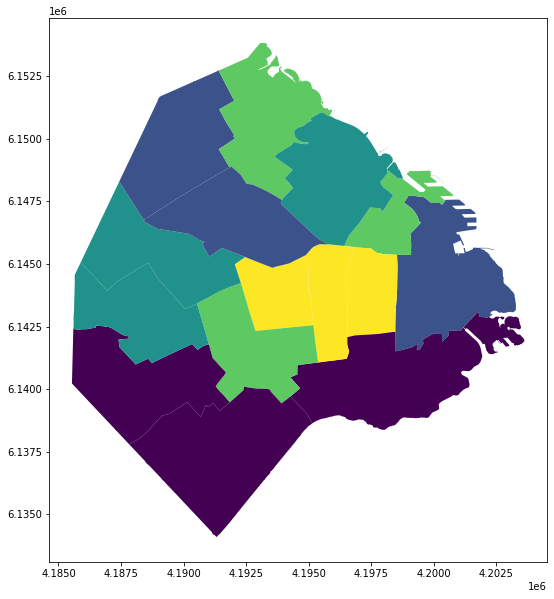

In [ ]:
# Densidad a nivel Departamento. ¿MAUP?
fracciones = censo[['DEPTO','AREA','TOT_POB','geometry']].dissolve(by='DEPTO', aggfunc='sum')
fracciones['logRatio'] = (fracciones.TOT_POB/ fracciones.AREA)
fracciones.plot(column='logRatio', scheme='quantiles', figsize=(10, 10))

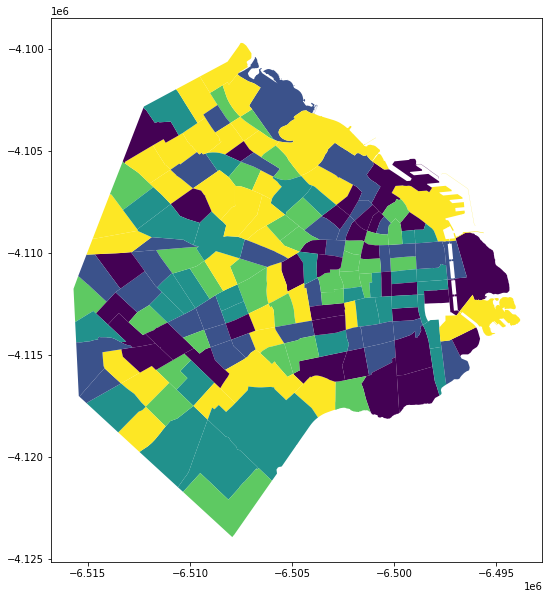

In [40]:
circuitos.plot(column='TOT_POB', scheme='quantiles', figsize=(10, 10))

In [41]:
circuitos.head()
circuitos.dtypes

distrito        object
provincia       object
departamen      object
cabecera        object
circuito        object
indec_p         object
indec_d         object
geometry      geometry
TOT_POB        float64
dtype: object

In [42]:
##Se Agrega la variable log ratio con la densidad poblacional
censo.dtypes

AREA           float64
PERIMETER      float64
PAIS0210_        int64
PAIS0210_I       int64
PROV            object
DEPTO           object
FRAC            object
RADIO           object
TIPO            object
LINK            object
VARONES        float64
MUJERES        float64
TOT_POB        float64
HOGARES        float64
VIV_PART       float64
VIV_PART_H     float64
geometry      geometry
logRatio       float64
dtype: object

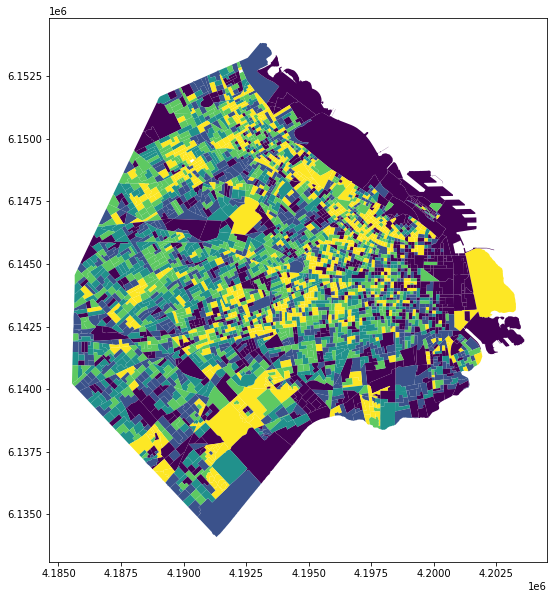

In [ ]:
censo.plot(column='HOGARES', scheme='quantiles', figsize=(10, 10))

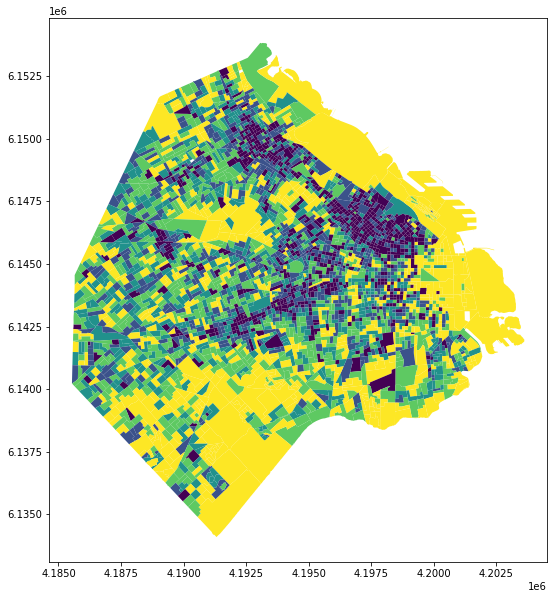

In [ ]:
##Cantidad de masculinos sobre femeninos
censo['masculinos'] = (censo.VARONES/ censo.MUJERES)
censo.plot(column='masculinos', scheme='quantiles', figsize=(10, 10))

In [54]:
##Incorporar csv de radio, viviendas, hogar y personas##
provincia= pd.read_csv ('/content/drive/MyDrive/dataset/censo2010/censo/prov.csv')
departamento=pd.read_csv ('/content/drive/MyDrive/dataset/censo2010/censo/dpto.csv')
fraccion= pd.read_csv ('/content/drive/MyDrive/dataset/censo2010/censo/frac.csv')
radios = pd.read_csv ('/content/drive/MyDrive/dataset/censo2010/censo/radio.csv')
viviendas = pd.read_csv ('/content/drive/MyDrive/dataset/censo2010/censo/vivienda.csv')
hogar= pd.read_csv('/content/drive/MyDrive/dataset/censo2010/censo/hogar.csv')
personas= pd.read_csv ('/content/drive/MyDrive/dataset/censo2010/censo/persona.csv')


In [56]:
##Inner join entre provincia y depto##
inner_depto= pd.merge(provincia, departamento, on='PROV_REF_ID', how='inner')
inner_depto

,PROV_REF_ID,CPV2010_REF_ID,IDPROV,PROV,NOMPROV,DPTO_REF_ID,IDDPTO,DPTO,NOMDPTO
0,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...
1,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,2,2,2002,Comuna 02 ...
2,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,3,3,2003,Comuna 03 ...
3,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,4,4,2004,Comuna 04 ...
4,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,5,5,2005,Comuna 05 ...
5,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,6,6,2006,Comuna 06 ...
6,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,7,7,2007,Comuna 07 ...
7,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,8,8,2008,Comuna 08 ...
8,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,9,9,2009,Comuna 09 ...
9,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,10,10,2010,Comuna 10 ...


In [58]:
##Inner join entre depto y fraccion##
inner_frac= pd.merge(inner_depto, fraccion, on='DPTO_REF_ID', how='inner')
inner_frac

,PROV_REF_ID,CPV2010_REF_ID,IDPROV,PROV,NOMPROV,DPTO_REF_ID,IDDPTO,DPTO,NOMDPTO,FRAC_REF_ID,IDFRAC
0,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1
1,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,2,2
2,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,3,3
3,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,4,4
4,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,5,5
...,...,...,...,...,...,...,...,...,...,...,...
346,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,347,17
347,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,348,18
348,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,349,19
349,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,350,20


In [59]:
##Inner join entre fraccion y radio mediante la key compartida
radio= pd.merge(inner_frac, radios, on='FRAC_REF_ID', how='inner')
radio

,PROV_REF_ID,CPV2010_REF_ID,IDPROV,PROV,NOMPROV,DPTO_REF_ID,IDDPTO,DPTO,NOMDPTO,FRAC_REF_ID,IDFRAC,RADIO_REF_ID,IDRADIO
0,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1
1,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,2,2,2,1
2,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,2,2,3,2
3,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,2,2,4,3
4,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,2,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3549,9
3548,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3550,10
3549,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3551,11
3550,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3552,12


In [60]:
##Inner join entre radio y viviendas mediante la key compartida
inner_join_radio = pd.merge (radio, viviendas, on='RADIO_REF_ID', how='inner')
inner_join_radio

,PROV_REF_ID,CPV2010_REF_ID,IDPROV,PROV,NOMPROV,DPTO_REF_ID,IDDPTO,DPTO,NOMDPTO,FRAC_REF_ID,IDFRAC,RADIO_REF_ID,IDRADIO,VIVIENDA_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,LOCAL,INCALCONS,TOTHOG
0,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2
1,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,2,1,7,1,0,1,1,2,20010001,2001010,2,2
2,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,3,1,4,1,0,1,1,1,20010001,2001010,1,2
3,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,4,1,4,1,0,1,1,1,20010001,2001010,1,1
4,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,5,1,1,1,0,1,3,3,20010001,2001010,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085458,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426434,1,4,1,0,1,1,1,20150001,2015010,1,1
1085459,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426435,1,4,1,0,1,1,1,20150001,2015010,1,1
1085460,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426436,1,4,1,0,1,1,1,20150001,2015010,1,1
1085461,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426437,2,0,0,9,1,0,0,20150001,2015010,0,3


In [61]:
##Inner join entre viviendas y hogar mediante la key compartida
inner_join_vivienda= pd.merge (inner_join_radio, hogar, on='VIVIENDA_REF_ID', how='inner')
inner_join_vivienda

,PROV_REF_ID,CPV2010_REF_ID,IDPROV,PROV,NOMPROV,DPTO_REF_ID,IDDPTO,DPTO,NOMDPTO,FRAC_REF_ID,IDFRAC,RADIO_REF_ID,IDRADIO,VIVIENDA_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,LOCAL,INCALCONS,TOTHOG,HOGAR_REF_ID,NHOG,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H19A,H19B,H19C,H19D,PROP,INDHAC,TOTPERS,ALGUNBI
0,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2,1,1,1,4,1,1,1,1,1,1,1,1,2,2,1,2,1,2,5,1,1,0
1,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,0
2,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2,3,4,1,3,1,1,1,1,1,1,1,1,3,5,1,1,1,1,1,1,2,0
3,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2,4,6,1,1,1,1,1,1,1,1,1,1,3,5,1,1,1,1,5,6,8,1
4,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,2,1,7,1,0,1,1,2,20010001,2001010,2,2,5,1,1,1,2,1,1,1,1,1,1,1,5,5,1,1,2,1,6,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152594,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426434,1,4,1,0,1,1,1,20150001,2015010,1,1,1152595,1,1,2,1,1,1,1,1,1,1,1,2,3,1,1,1,1,1,1,1,0
1152595,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426435,1,4,1,0,1,1,1,20150001,2015010,1,1,1152596,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,1,1,1,1,0
1152596,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426436,1,4,1,0,1,1,1,20150001,2015010,1,1,1152597,1,1,1,1,1,1,1,1,1,1,1,2,3,1,1,1,1,1,3,3,0
1152597,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426437,2,0,0,9,1,0,0,20150001,2015010,0,3,1152598,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,2


In [62]:
##Inner join entre hogar y personas mediante la key compartida
inner_join_final= pd.merge (inner_join_vivienda, personas, on='HOGAR_REF_ID', how='inner')
inner_join_final


,PROV_REF_ID,CPV2010_REF_ID,IDPROV,PROV,NOMPROV,DPTO_REF_ID,IDDPTO,DPTO,NOMDPTO,FRAC_REF_ID,IDFRAC,RADIO_REF_ID,IDRADIO,VIVIENDA_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,LOCAL,INCALCONS,TOTHOG,HOGAR_REF_ID,NHOG,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H19A,H19B,H19C,H19D,PROP,INDHAC,TOTPERS,ALGUNBI,PERSONA_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
0,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2,1,1,1,4,1,1,1,1,1,1,1,1,2,2,1,2,1,2,5,1,1,0,1,1,2,61,1,0,1,2,2,13,2,4,2,1
1,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,0,2,1,1,48,1,0,1,1,2,10,2,4,1,1
2,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2,3,4,1,3,1,1,1,1,1,1,1,1,3,5,1,1,1,1,1,1,2,0,3,1,1,65,1,0,1,1,3,14,2,7,2,1
3,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2,3,4,1,3,1,1,1,1,1,1,1,1,3,5,1,1,1,1,1,1,2,0,4,2,2,62,1,0,1,1,2,13,2,6,1,3
4,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,1,1,2001,Comuna 01 ...,1,1,1,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2,4,6,1,1,1,1,1,1,1,1,1,1,3,5,1,1,1,1,5,6,8,1,5,1,1,20,2,221,1,1,2,5,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,1,1,0,0,20150001,2015010,0,3,1152599,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,2,2890147,0,2,95,1,0,1,0,3,20,2,2,1,0
2890147,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,1,1,0,0,20150001,2015010,0,3,1152599,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,2,2890148,0,2,91,1,0,1,0,3,19,2,6,1,0
2890148,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,1,1,0,0,20150001,2015010,0,3,1152599,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,2,2890149,0,2,83,1,0,1,0,3,17,2,2,1,0
2890149,1,1,2,2,Ciudad Autónoma de Buenos Aires ...,15,15,2015,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,1,1,0,0,20150001,2015010,0,3,1152599,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,2,2890150,0,2,89,1,0,1,0,3,18,2,2,1,0


In [ ]:
##Concatenar variable y formar la variable link##
inner_join_final['LINK'] = (inner_join_final.IDPROV+inner_join_final.IDDPTO+inner_join_final.IDFRAC+inner_join_final.IDRADIO)

In [65]:
##Incorporar geometry a la tabla censal de datos
censo_ordenado

,AREA,PERIMETER,PAIS0210_,PAIS0210_I,PROV,DEPTO,FRAC,RADIO,TIPO,LINK,VARONES,MUJERES,TOT_POB,HOGARES,VIV_PART,VIV_PART_H,geometry,logRatio
655,1795471.00,14434.790,657,656,02,001,01,01,U,020010101,212.0,124.0,336.0,65.0,80.0,38.0,"POLYGON ((4200423.338 6147563.597, 4201006.845...",0.000187
640,27321.00,918.364,642,641,02,001,02,01,U,020010201,232.0,246.0,478.0,161.0,148.0,134.0,"POLYGON ((4199279.313 6147724.714, 4199282.235...",0.017496
647,17702.00,767.956,649,648,02,001,02,02,U,020010202,188.0,213.0,401.0,128.0,124.0,114.0,"POLYGON ((4199158.452 6147700.204, 4199146.598...",0.022653
675,10962.88,526.113,677,676,02,001,02,03,U,020010203,170.0,167.0,337.0,104.0,104.0,98.0,"POLYGON ((4199337.504 6147560.528, 4199358.249...",0.030740
645,136260.50,1822.664,647,646,02,001,02,04,U,020010204,297.0,305.0,602.0,163.0,120.0,110.0,"POLYGON ((4199385.919 6147696.172, 4199395.838...",0.004418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,19842.00,573.522,1361,1346,02,015,21,09,U,020152109,390.0,473.0,863.0,392.0,508.0,379.0,"POLYGON ((4194919.245 6145653.106, 4195024.672...",0.043494
1328,16367.38,516.821,1330,1315,02,015,21,10,U,020152110,269.0,344.0,613.0,278.0,387.0,274.0,"POLYGON ((4195024.672 6145722.864, 4195129.066...",0.037453
1299,17742.38,538.986,1301,1286,02,015,21,11,U,020152111,339.0,358.0,697.0,335.0,438.0,324.0,"POLYGON ((4195129.066 6145792.180, 4195232.897...",0.039284
1272,20234.75,588.110,1274,1259,02,015,21,12,U,020152112,235.0,275.0,510.0,217.0,276.0,215.0,"POLYGON ((4195232.897 6145860.523, 4195345.091...",0.025204


In [20]:
##Incorporar Csv elecciones
rossetta= pd.read_csv ('/content/drive/MyDrive/dataset/elecciones_2019/rosetta.csv')
resultados2019= pd.read_csv ('/content/drive/MyDrive/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv')


In [21]:
##CARGAR ROSETTA
rossetta

,CODIGO_MESA_2019,CODIGO_CIRCUITO_2017
0,0100100001X,1001000001
1,0100100002X,1001000001
2,0100100003X,1001000001
3,0100100004X,1001000001
4,0100100005X,1001000001
...,...,...
7408,0101507409X,1015000167
7409,0101507410X,1015000167
7410,0101507411X,1015000167
7411,0101507412X,1015000167


In [22]:
##Renombrar columnas para el inner join con rossetta
resultados2019.rename(columns={'CODIGO_MESA': 'CODIGO_MESA_2019', 'CODIGO_CIRCUITO': 'CODIGO_CIRCUITO_2019'}, inplace=True)
resultados2019

,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO_2019,CODIGO_MESA_2019,CODIGO_CATEGORIA,CODIGO_AGRUPACION,VOTOS_AGRUPACION,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION
0,1,1001,1001000001,0100100001X,100000000000,13,1,Presidente y Vicepresidente de la República,COMUNA 01,MOVIMIENTO AL SOCIALISMO
1,1,1001,1001000001,0100100001X,100000000000,131,5,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE NOS
2,1,1001,1001000001,0100100001X,100000000000,132,2,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE PATRIOTA
3,1,1001,1001000001,0100100001X,100000000000,133,15,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
4,1,1001,1001000001,0100100001X,100000000000,135,85,Presidente y Vicepresidente de la República,COMUNA 01,JUNTOS POR EL CAMBIO
...,...,...,...,...,...,...,...,...,...,...
616673,1,1015,1015000167,0101507413X,901015000000,87,7,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,UNITE POR LA LIBERTAD Y LA DIGNIDAD
616674,1,1015,1015000167,0101507413X,901015000000,VB,25,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,BLANCO
616675,1,1015,1015000167,0101507413X,901015000000,VII,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,IMPUGNADO
616676,1,1015,1015000167,0101507413X,901015000000,VN,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,NULO


In [23]:
##Agregar la traduccion de los circuitos 2017 a los 2019##
inner_join_rossetta= pd.merge(resultados2019, rossetta, on='CODIGO_MESA_2019', how='inner')
inner_join_rossetta

,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO_2019,CODIGO_MESA_2019,CODIGO_CATEGORIA,CODIGO_AGRUPACION,VOTOS_AGRUPACION,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION,CODIGO_CIRCUITO_2017
0,1,1001,1001000001,0100100001X,100000000000,13,1,Presidente y Vicepresidente de la República,COMUNA 01,MOVIMIENTO AL SOCIALISMO,1001000001
1,1,1001,1001000001,0100100001X,100000000000,131,5,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE NOS,1001000001
2,1,1001,1001000001,0100100001X,100000000000,132,2,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE PATRIOTA,1001000001
3,1,1001,1001000001,0100100001X,100000000000,133,15,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,1001000001
4,1,1001,1001000001,0100100001X,100000000000,135,85,Presidente y Vicepresidente de la República,COMUNA 01,JUNTOS POR EL CAMBIO,1001000001
...,...,...,...,...,...,...,...,...,...,...,...
614814,1,1015,1015000167,0101507413X,901015000000,87,7,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,UNITE POR LA LIBERTAD Y LA DIGNIDAD,1015000167
614815,1,1015,1015000167,0101507413X,901015000000,VB,25,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,BLANCO,1015000167
614816,1,1015,1015000167,0101507413X,901015000000,VII,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,IMPUGNADO,1015000167
614817,1,1015,1015000167,0101507413X,901015000000,VN,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,NULO,1015000167


In [25]:
##Votos de JXC POR CIRCUITO
SUMA_PRO=(inner_join_rossetta[inner_join_rossetta.NOMBRE_CATEGORIA=="Presidente y Vicepresidente de la República"][inner_join_rossetta.NOMBRE_AGRUPACION.isin(["JUNTOS POR EL CAMBIO"])][["CODIGO_CIRCUITO_2017", "VOTOS_AGRUPACION"]].groupby(["CODIGO_CIRCUITO_2017"]).sum())
SUMA_PRO

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,VOTOS_AGRUPACION
CODIGO_CIRCUITO_2017,
1001000001,2637
1001000002,2274
1001000003,1245
1001000004,1222
1001000005,899
...,...
1015000163,3291
1015000164,3225
1015000165,6670


In [26]:
##TOTAL DE VOTOS DE LOS CANDIDATOS DIVIDIDO POR CIRCUITO
VOTOS_TOTAL_CANDIDATOS=(inner_join_rossetta[inner_join_rossetta.NOMBRE_CATEGORIA=="Presidente y Vicepresidente de la República"][["CODIGO_CIRCUITO_2017", "VOTOS_AGRUPACION"]].groupby(["CODIGO_CIRCUITO_2017"]).sum())
VOTOS_TOTAL_CANDIDATOS.reset_index(level=0, inplace=True)
VOTOS_TOTAL_CANDIDATOS

,CODIGO_CIRCUITO_2017,VOTOS_AGRUPACION
0,1001000001,7137
1,1001000002,6643
2,1001000003,1755
3,1001000004,1622
4,1001000005,5402
...,...,...
162,1015000163,9538
163,1015000164,8654
164,1015000165,15832
165,1015000166,13176


In [27]:
##CAMBIA EL INDEX de los votos de JXC
SUMA_JXC=(inner_join_rossetta[inner_join_rossetta.NOMBRE_CATEGORIA=="Presidente y Vicepresidente de la República"][inner_join_rossetta.NOMBRE_AGRUPACION.isin(["JUNTOS POR EL CAMBIO"])][["CODIGO_CIRCUITO_2017", "VOTOS_AGRUPACION"]].groupby(["CODIGO_CIRCUITO_2017"]).sum())
SUMA_JXC.reset_index(level=0, inplace=True)
SUMA_JXC

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,CODIGO_CIRCUITO_2017,VOTOS_AGRUPACION
0,1001000001,2637
1,1001000002,2274
2,1001000003,1245
3,1001000004,1222
4,1001000005,899
...,...,...
162,1015000163,3291
163,1015000164,3225
164,1015000165,6670
165,1015000166,5191


In [28]:
##ORDENAR POR N DE CIRCUITO
circuitos_ordenado=circuitos.sort_values('circuito')
circuitos_ordenado.reset_index(level=0, inplace=True)
##Incorporar los circuitos de 2017
circuitos_ordenado['circuitos2017']= (SUMA_JXC.CODIGO_CIRCUITO_2017)
circuitos_ordenado['VOTOS_JXC']= (SUMA_JXC.VOTOS_AGRUPACION)
circuitos_ordenado['VOTOS_TOTAL']=(VOTOS_TOTAL_CANDIDATOS.VOTOS_AGRUPACION)
circuitos_ordenado


,index,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,TOT_POB,circuitos2017,VOTOS_JXC,VOTOS_TOTAL
0,7,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0001,02,001,"POLYGON Z ((-6497294.216 -4112418.125 0.000, -...",NaN,1001000001,2637,7137
1,8,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0002,02,001,"POLYGON Z ((-6498537.655 -4112014.483 0.000, -...",0.005662,1001000002,2274,6643
2,0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4108992.762 0.000, -...",0.000371,1001000003,1245,1755
3,16,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0004,02,001,"POLYGON Z ((-6497398.411 -4111296.240 0.000, -...",0.013422,1001000004,1222,1622
4,5,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0005,02,001,MULTIPOLYGON Z (((-6497185.903 -4106300.515 0....,0.064722,1001000005,899,5402
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,161,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0163,02,015,"POLYGON Z ((-6505348.070 -4108122.319 0.000, -...",0.041744,1015000163,3291,9538
163,157,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0164,02,015,"POLYGON Z ((-6507652.050 -4109206.698 0.000, -...",0.033294,1015000164,3225,8654
164,152,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0165,02,015,"POLYGON Z ((-6508638.340 -4105991.457 0.000, -...",0.054359,1015000165,6670,15832
165,153,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0166,02,015,"POLYGON Z ((-6508941.686 -4107957.487 0.000, -...",0.009472,1015000166,5191,13176


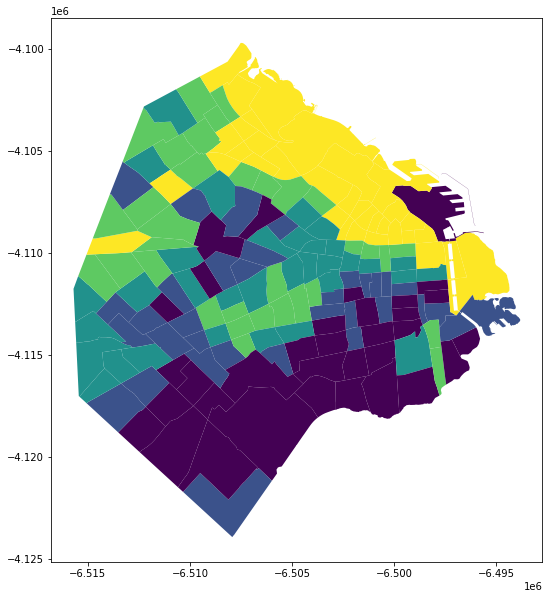

In [29]:
#Incorporo a variable porcentaje por circuito y ploteo en el mapa
circuitos_ordenado['PORCENTAJE_JXC']=((circuitos_ordenado.VOTOS_JXC/circuitos_ordenado.VOTOS_TOTAL)*100)
circuitos_ordenado.plot(column='PORCENTAJE_JXC', scheme='quantiles', figsize=(10, 10))

In [30]:
circuitos_ordenado

,index,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,TOT_POB,circuitos2017,VOTOS_JXC,VOTOS_TOTAL,PORCENTAJE_JXC
0,7,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0001,02,001,"POLYGON Z ((-6497294.216 -4112418.125 0.000, -...",NaN,1001000001,2637,7137,36.948298
1,8,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0002,02,001,"POLYGON Z ((-6498537.655 -4112014.483 0.000, -...",0.005662,1001000002,2274,6643,34.231522
2,0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4108992.762 0.000, -...",0.000371,1001000003,1245,1755,70.940171
3,16,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0004,02,001,"POLYGON Z ((-6497398.411 -4111296.240 0.000, -...",0.013422,1001000004,1222,1622,75.339088
4,5,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0005,02,001,MULTIPOLYGON Z (((-6497185.903 -4106300.515 0....,0.064722,1001000005,899,5402,16.641984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,161,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0163,02,015,"POLYGON Z ((-6505348.070 -4108122.319 0.000, -...",0.041744,1015000163,3291,9538,34.504089
163,157,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0164,02,015,"POLYGON Z ((-6507652.050 -4109206.698 0.000, -...",0.033294,1015000164,3225,8654,37.266004
164,152,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0165,02,015,"POLYGON Z ((-6508638.340 -4105991.457 0.000, -...",0.054359,1015000165,6670,15832,42.129864
165,153,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0166,02,015,"POLYGON Z ((-6508941.686 -4107957.487 0.000, -...",0.009472,1015000166,5191,13176,39.397389


In [81]:
##Creo la variable link para linkear .shp y .csv del censo y tener los parametros espaciales##
LINK= pd.concat([censo_ordenado.PROV, censo_ordenado.DEPTO, censo_ordenado.FRAC, censo_ordenado.RADIO], axis=1, sort=True)
LINK['LINK']=(LINK.PROV+LINK.DEPTO+LINK.FRAC+LINK.RADIO)
LINK

,PROV,DEPTO,FRAC,RADIO,LINK
0,02,013,03,02,020130302
1,02,013,11,01,020131101
2,02,013,01,04,020130104
3,02,013,01,03,020130103
4,02,013,01,02,020130102
...,...,...,...,...,...
3550,02,008,12,02,020081202
3551,02,008,09,07,020080907
3552,02,008,12,05,020081205
3553,02,008,12,01,020081201
